# Analysing Police Activity with Pandas

This notebook aims to analyze police activity data from Tennessee, Nashville, using Pandas. The analysis will focus on understanding patterns related to gender, time of the day, and other factors in traffic stops.


## Data Loading and Cleaning

### Import the Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Data

In [3]:
df = pd.read_csv('tn_nashville_2020_04_01.csv')

C:\Users\Mankabir\AppData\Local\Temp\ipykernel_14540\4182936927.py:1: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tn_nashville_2020_04_01.csv')


## Initial Data Exploration

Getting a feel for the data by looking at the first few rows, the column names, and the original row count.


In [4]:
print(df.head())

  raw_row_number        date      time  \
0         232947  2010-10-10       NaN   
1         237161  2010-10-10  10:00:00   
2         232902  2010-10-10  10:00:00   
3         233219  2010-10-10  22:00:00   
4         232780  2010-10-10  01:00:00   

                                            location        lat        lng  \
0  DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...  36.187925 -86.798519   
1            1122 LEBANON PIKE, NASHVILLE, TN, 37210  36.155521 -86.735902   
2                       898 DAVIDSON DR, , TN, 37205  36.117420 -86.895593   
3  MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...  36.086799 -86.648581   
4                      BUCHANAN ST, NORTH, TN, 37208  36.180038 -86.809109   

  precinct  reporting_area   zone  subject_age  ...  \
0      6.0          4403.0  611.0         27.0  ...   
1      5.0          9035.0  513.0         18.0  ...   
2      1.0          5005.0  121.0         52.0  ...   
3      3.0          8891.0  325.0         25.0  ...   
4  

In [6]:
print(df.columns)

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')


In [11]:
row_count = len(df)
print(f'Original Row Count of DataFrame: {row_count}')

Original Row Count of DataFrame: 3092351


## Data Cleaning and Preprocessing

Preparing the data for analysis by handling missing values and creating additional columns as required.


In [12]:
nan_count = df['time'].isna().sum()
print(nan_count)

5467


In [12]:
new_df = df[df['time'].notna()].copy()

In [13]:
new_row_count = len(new_df)
print(f'New Row Count of DataFrame: {new_row_count}')

New Row Count of DataFrame: 3086884


### Creating a Datetime Index

Splitting the 'time' column to create separate hour and minute columns, which will be useful for time-based analysis.


In [14]:
time_split = new_df['time'].str.split(':', expand=True)
new_df['hour'] = time_split[0].astype(int)
new_df['minute'] = time_split[1].astype(int)

In [15]:
hourly_count = new_df.groupby('hour').size()
print(hourly_count)

hour
0     150878
1     107333
2      78716
3      62944
4      53923
5      68576
6      44623
7      96005
8     144043
9     157989
10    167580
11    126215
12    161046
13    155085
14    105012
15    160626
16    183053
17    156616
18    126324
19    145325
20    164395
21    162778
22    131879
23    175920
dtype: int64


## Exploratory Data Analysis (EDA)

Visualizing the number of violations per hour to understand trends over the day.


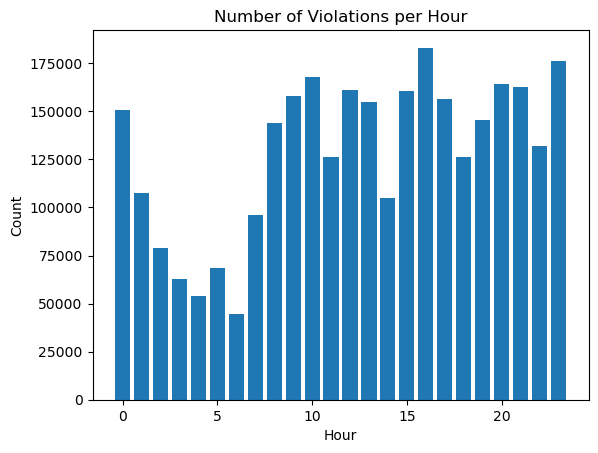

In [16]:
plt.bar(hourly_count.index, hourly_count.values)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Violations per Hour')
plt.show()

### Analyzing Drug-related Incidents

Question: How often are drugs found during traffic stops?

This section counts the instances where drugs were found during traffic stops.


In [8]:
num_drugs_found = df['contraband_drugs'].sum()
print(f"Drugs were found {num_drugs_found} times.")

Drugs were found 21377 times.


### Identifying the Most Active Officer

Question: Which officer has made the most stops?

To identify the officer who has conducted the most traffic stops, we employ a two-step process using Pandas functions:

1. **Frequency Count:** We use the `value_counts()` function to count the frequency of each unique value in the `officer_id_hash` column. This step helps in determining how many stops each officer has made.

2. **Maximum Stops Identification:** 
    - The `idxmax()` function is utilized to find the ID of the officer with the highest count of stops. 
    - The `max()` function is then used to retrieve the actual number of stops made by that officer. 

This analysis could provide insights into the activity level or area coverage of individual officers. The results are then displayed to identify the most active officer in the dataset.


In [10]:
officer_most_stops = df['officer_id_hash'].value_counts().idxmax()
num_stops = df['officer_id_hash'].value_counts().max()
print(f"The officer who made the most stops has the id {officer_most_stops}, with {num_stops} stops.")

The officer who made the most stops has the id b5ca91d71f, with 40790 stops.


### Calculating Arrest Rate

Question: What is the overall percentage of traffic stops that result in an arrest?

This analysis provides insights into how frequently traffic stops lead to arrests.


In [15]:
percentage_arrests = df['arrest_made'].mean() * 100
print(f'Percentage of stops resulting in an arrest: {percentage_arrests}%')

Percentage of stops resulting in an arrest: 1.6235690773570548%


### Exploring Reasons for Stops

Question: What are the various reasons for traffic stops?

This section lists out the unique reasons recorded for traffic stops, providing an overview of the most common factors leading to police stops.


In [18]:
unique_reasons = df['reason_for_stop'].unique()
print(unique_reasons)

['investigative stop' 'moving traffic violation'
 'vehicle equipment violation' 'registration' 'seatbelt violation'
 'safety violation' nan 'parking violation' 'child restraint']
